In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#This is the data we will use for this assignment
url= 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
housing = pd.read_csv(url)
print(housing.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [198]:
vlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing[vlist] = housing[vlist].apply(binary_map)
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [199]:
def gradient_descent(X_train, y_train, X, Y, theta, alpha, iterations):
    m = len(y_train)  # Number of training examples
    train_his = np.zeros(iterations)
    test_his = np.zeros(iterations)

    for i in range(iterations):
        predictions = X_train.dot(theta)
        errors = np.subtract(predictions, y_train)
        sum_delta = (alpha / m) * X_train.transpose().dot(errors)
        theta -= sum_delta
        train_his[i] = compute_cost(X_train, y_train, theta)
        test_his[i] = compute_cost(X, Y, theta)

    return theta, train_his, test_his

def gradient_descent_regularized(X_train, y_train, X, Y, theta, alpha, iterations, lambda_reg):
    m = len(y_train)
    train_his = np.zeros(iterations)
    test_his = np.zeros(iterations)

    for i in range(iterations):
        predictions = X_train.dot(theta)
        errors = np.subtract(predictions, y_train)

        # Regularized gradient (don't regularize bias term theta[0])
        grad = (1/m) * X_train.transpose().dot(errors)
        grad[1:] = grad[1:] + (lambda_reg/m) * theta[1:]  # Add regularization for non-bias terms

        theta -= alpha * grad

        # Compute costs
        train_his[i] = compute_cost_regularized(X_train, y_train, theta, lambda_reg)
        test_his[i] = compute_cost(X, Y, theta)  # No regularization for test

    return theta, train_his, test_his

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J
def compute_cost_regularized(X, y, theta, lambda_reg):
    m = len(y)
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)

    # Regularization term (don't regularize bias term theta[0])
    reg_term = (lambda_reg / (2 * m)) * np.sum(np.square(theta[1:]))

    J = (1 / (2 * m)) * np.sum(sqrErrors) + reg_term
    return J


In [200]:
#1A
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)
num_vars = ['area', 'bed', 'bath', 'parking', 'floors','price']

y_train = df_train.pop('price').values.reshape(-1,1)
X_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))

Y = df_test.pop('price').values.reshape(-1,1)
X = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
X = np.column_stack((np.ones(X.shape[0]), X))

theta = np.zeros((X_train.shape[1], 1))
iterations = 2000
alpha = 0.05
theta, train_his, test_his = gradient_descent(X_train, y_train, X, Y, theta, alpha, iterations)

print('Final Theta Value: ', theta)
print('Final Train Cost: ', train_his)
print('Final Test Cost: ', test_his)

Final Theta Value:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Final Train Cost:  [2.79087696e+25 6.74448247e+37 1.62988352e+50 ...            nan
            nan            nan]
Final Test Cost:  [2.85281114e+25 6.89415337e+37 1.66605326e+50 ...            nan
            nan            nan]


/tmp/ipython-input-4211963550.py:41: RuntimeWarning: overflow encountered in square
  sqrErrors = np.square(errors)
/tmp/ipython-input-4211963550.py:10: RuntimeWarning: invalid value encountered in subtract
  theta -= sum_delta


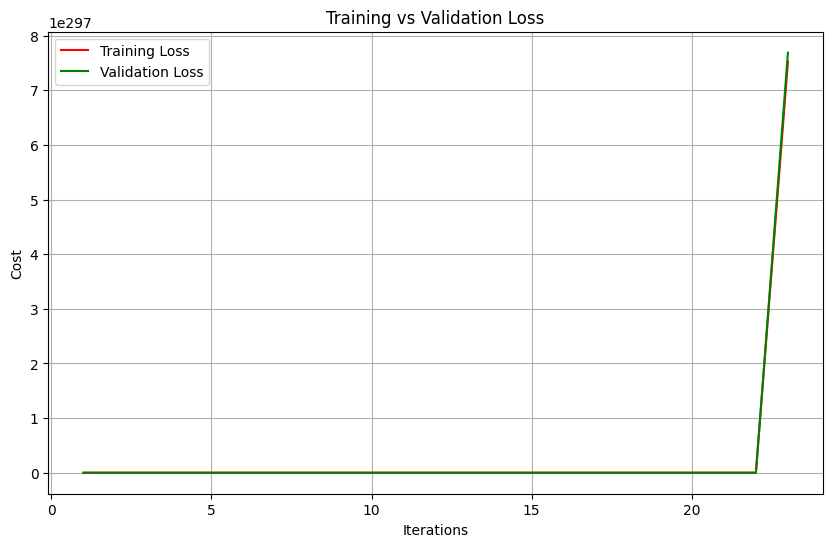

In [201]:
#Data plot for 1A
plt.plot(range(1, iterations + 1),train_his, color='red', label='Training Loss')
plt.plot(range(1, iterations + 1),test_his, color='green', label='Validation Loss')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [202]:
#1B
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea','price']

y_train = df_train.pop('price').values.reshape(-1,1)
X_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))

y = df_test.pop('price').values.reshape(-1,1)
X = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
X = np.column_stack((np.ones(X.shape[0]), X))

theta = np.zeros((X_train.shape[1], 1))
iterations = 2000
alpha = 0.05
theta, train_his, test_his = gradient_descent(X_train, y_train, X, Y, theta, alpha, iterations)

print('Theta Value: ', theta)
print('Train Cost: ', train_his)
print('Test Cost: ', test_his)

Theta Value:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Train Cost:  [2.79087716e+25 6.74448339e+37 1.62988385e+50 ...            nan
            nan            nan]
Test Cost:  [2.85281134e+25 6.89415431e+37 1.66605359e+50 ...            nan
            nan            nan]


/tmp/ipython-input-4211963550.py:41: RuntimeWarning: overflow encountered in square
  sqrErrors = np.square(errors)
/tmp/ipython-input-4211963550.py:10: RuntimeWarning: invalid value encountered in subtract
  theta -= sum_delta


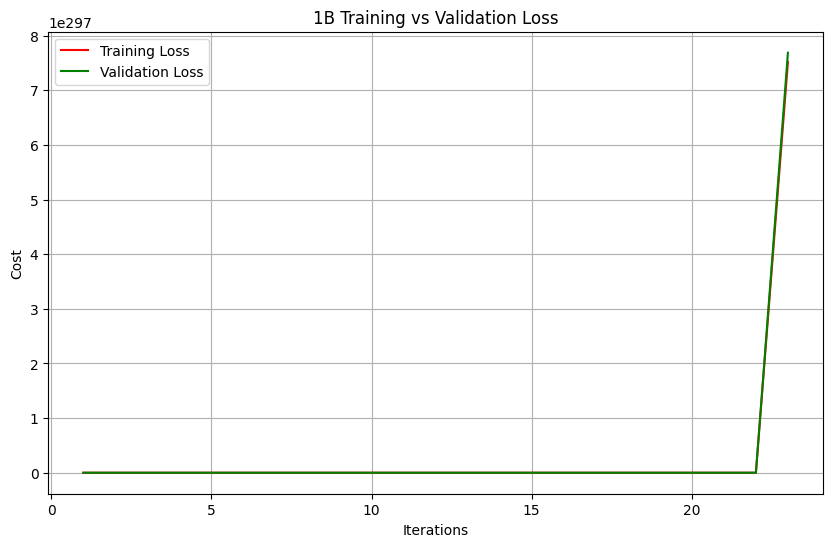

In [203]:
#Data plot for 1B
plt.plot(range(1, iterations + 1),train_his, color='red', label='Training Loss')
plt.plot(range(1, iterations + 1),test_his, color='green', label='Validation Loss')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('1B Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

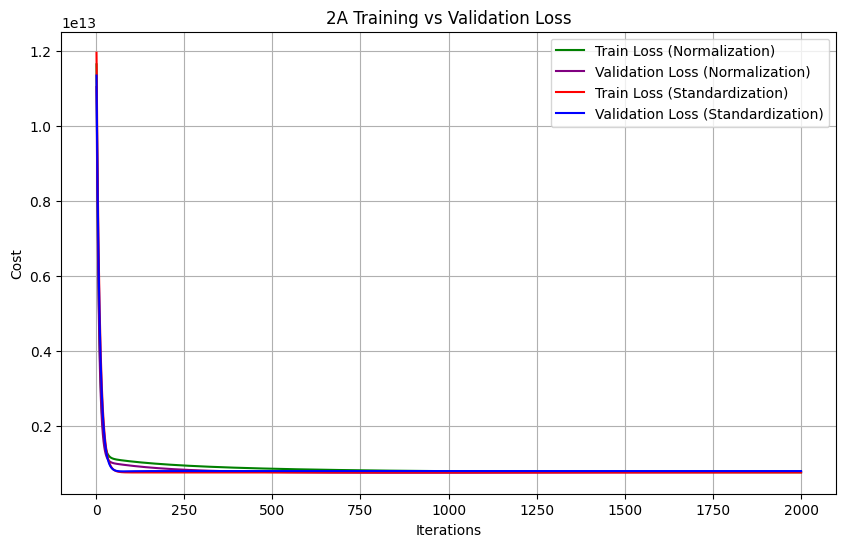

In [204]:
#2A
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

y_train = df_train.pop('price').values.reshape(-1,1)
Y  = df_test.pop('price').values.reshape(-1,1)
X_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
X  = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]

#Normalization
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_norm  = scaler_norm.transform(X)

X_train_norm = np.column_stack((np.ones(X_train_norm.shape[0]), X_train_norm))
X_norm  = np.column_stack((np.ones(X_norm.shape[0]), X_norm))

theta_norm = np.zeros((X_train_norm.shape[1], 1))
iterations = 2000
alpha = 0.05
theta_norm, train_cost_norm, test_cost_norm = gradient_descent(X_train_norm, y_train, X_norm, Y, theta_norm, alpha, iterations)

#Standarization
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
x_standard   = scaler_std.transform(X)

X_train_std = np.column_stack((np.ones(X_train_std.shape[0]), X_train_std))
x_standard   = np.column_stack((np.ones(x_standard .shape[0]), x_standard ))

theta_std = np.zeros((X_train_std.shape[1], 1))
iterations = 2000
alpha = 0.05
theta_std, train_cost_std, test_cost_std = gradient_descent(X_train_std, y_train, x_standard , Y, theta_std, alpha, iterations)

#Data plot for 2A
plt.figure(figsize=(10,6))
plt.plot(range(1, 2001), train_cost_norm, label='Train Loss (Normalization)', color='green')
plt.plot(range(1, 2001), test_cost_norm, label='Validation Loss (Normalization)', color='purple')
plt.plot(range(1, 2001), train_cost_std, label='Train Loss (Standardization)', color='red')
plt.plot(range(1, 2001), test_cost_std, label='Validation Loss (Standardization)', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('2A Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

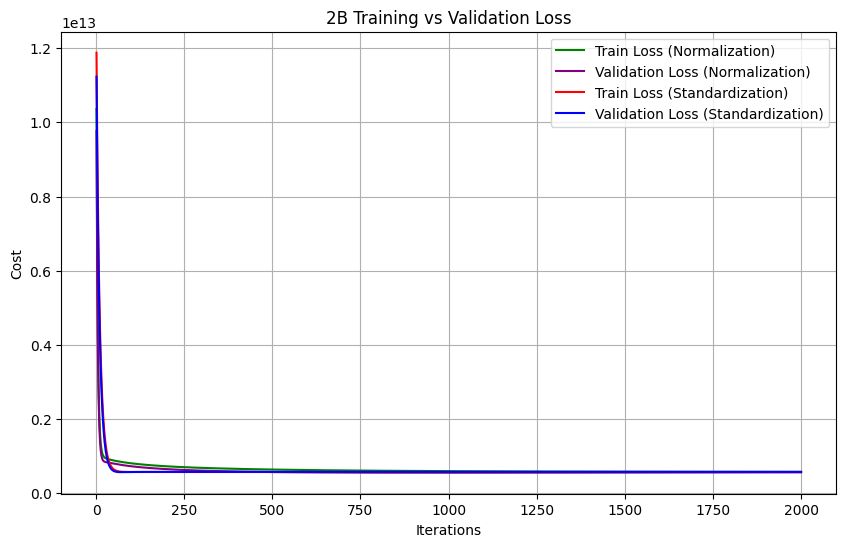

In [205]:
#2B
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea','price']

y_train = df_train.pop('price').values.reshape(-1,1)
Y  = df_test.pop('price').values.reshape(-1,1)
X_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
X  = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]

#Normalization
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_norm  = scaler_norm.transform(X)

X_train_norm = np.column_stack((np.ones(X_train_norm.shape[0]), X_train_norm))
X_norm  = np.column_stack((np.ones(X_norm.shape[0]), X_norm))

theta_norm = np.zeros((X_train_norm.shape[1], 1))
iterations = 2000
alpha = 0.05
theta_norm, train_cost_norm, test_cost_norm = gradient_descent(X_train_norm, y_train, X_norm, Y, theta_norm, alpha, iterations)

#Standardization
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
x_standard   = scaler_std.transform(X)

X_train_std = np.column_stack((np.ones(X_train_std.shape[0]), X_train_std))
x_standard   = np.column_stack((np.ones(x_standard .shape[0]), x_standard ))

theta_std = np.zeros((X_train_std.shape[1], 1))
iterations = 2000
alpha = 0.05
theta_std, train_cost_std, test_cost_std = gradient_descent(X_train_std, y_train, x_standard , Y, theta_std, alpha, iterations)

#Data plot for 2B
plt.figure(figsize=(10,6))
plt.plot(range(1, 2001), train_cost_norm, label='Train Loss (Normalization)', color='green')
plt.plot(range(1, 2001), test_cost_norm, label='Validation Loss (Normalization)', color='purple')
plt.plot(range(1, 2001), train_cost_std, label='Train Loss (Standardization)', color='red')
plt.plot(range(1, 2001), test_cost_std, label='Validation Loss (Standardization)', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('2B Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()
plt.show()

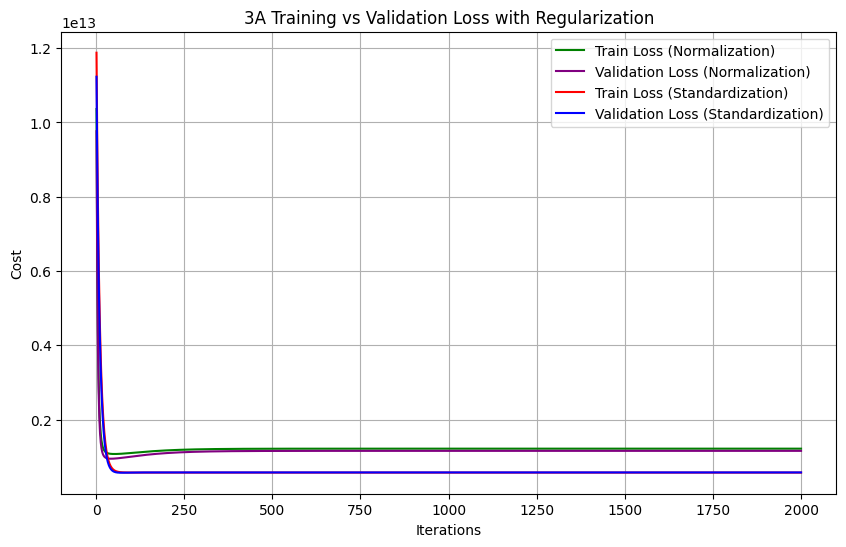

In [206]:
#3A
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

def gradient_descent(X_train, y_train, X, Y, theta, alpha, iterations, lam=0.1):
  m = len(y_train)
  train_his = np.zeros(iterations)
  valid_cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X_train.dot(theta)
    errors = np.subtract(predictions, y_train)
    sum_delta = (alpha / m) * X_train.transpose().dot(errors)
    sum_delta[1:] += (lam/m) * theta[1:]
    theta = theta - sum_delta
    train_his[i] = compute_cost(X_train, y_train, theta)
    valid_cost_history[i] = compute_cost(X, Y, theta)
  return theta, train_his, valid_cost_history

#Normalization
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_norm  = scaler_norm.transform(X)

X_train_norm = np.column_stack((np.ones(X_train_norm.shape[0]), X_train_norm))
X_norm  = np.column_stack((np.ones(X_norm.shape[0]), X_norm))

theta_norm = np.zeros((X_train_norm.shape[1], 1))
iterations = 2000
alpha = 0.05
lam = 10
theta_norm, train_cost_norm, test_cost_norm = gradient_descent(X_train_norm, y_train, X_norm, Y, theta_norm, alpha, iterations, lam)

#Standardization
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
x_standard   = scaler_std.transform(X)

X_train_std = np.column_stack((np.ones(X_train_std.shape[0]), X_train_std))
x_standard   = np.column_stack((np.ones(x_standard .shape[0]), x_standard ))

theta = np.zeros((X_train_std.shape[1], 1))
iterations = 2000
alpha = 0.05
lam = 0.1
theta_reg, train_cost_reg, test_cost_reg = gradient_descent(X_train_std, y_train, x_standard , Y, theta, alpha, iterations, lam)

# Plot
plt.figure(figsize=(10,6))
plt.plot(range(1, 2001), train_cost_norm, label='Train Loss (Normalization)', color='green')
plt.plot(range(1, 2001), test_cost_norm, label='Validation Loss (Normalization)', color='purple')
plt.plot(range(1, 2001), train_cost_std, label='Train Loss (Standardization)', color='red')
plt.plot(range(1, 2001), test_cost_std, label='Validation Loss (Standardization)', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('3A Training vs Validation Loss with Regularization')
plt.legend()
plt.grid(True)
plt.show()

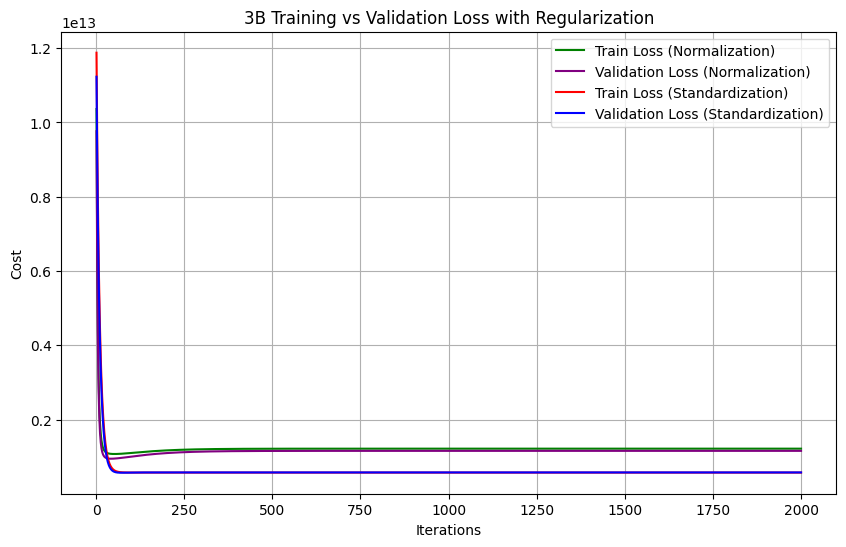

In [207]:
#3B
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea','price']

#Normalization
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_norm  = scaler_norm.transform(X)

X_train_norm = np.column_stack((np.ones(X_train_norm.shape[0]), X_train_norm))
X_norm  = np.column_stack((np.ones(X_norm.shape[0]), X_norm))

theta_norm = np.zeros((X_train_norm.shape[1], 1))
iterations = 2000
alpha = 0.05
lam = 10
theta_norm, train_cost_norm, test_cost_norm = gradient_descent(X_train_norm, y_train, X_norm, Y, theta_norm, alpha, iterations, lam)

#Standarization
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
x_standard   = scaler_std.transform(X)

X_train_std = np.column_stack((np.ones(X_train_std.shape[0]), X_train_std))
x_standard   = np.column_stack((np.ones(x_standard .shape[0]), x_standard ))

theta_std = np.zeros((X_train_std.shape[1], 1))
iterations = 2000
alpha = 0.05
lam = 10

theta_reg, train_cost_reg, test_cost_reg = gradient_descent(X_train_std, y_train, x_standard , Y, theta_std, alpha, iterations, lam)

# Plot
plt.figure(figsize=(10,6))
plt.plot(range(1, 2001), train_cost_norm, label='Train Loss (Normalization)', color='green')
plt.plot(range(1, 2001), test_cost_norm, label='Validation Loss (Normalization)', color='purple')
plt.plot(range(1, 2001), train_cost_std, label='Train Loss (Standardization)', color='red')
plt.plot(range(1, 2001), test_cost_std, label='Validation Loss (Standardization)', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('3B Training vs Validation Loss with Regularization')
plt.legend()
plt.grid(True)
plt.show()
